# Common Joint Distributions

1. [**Introduction to joint distributions**](#joint)
1. [**BivariateNormal**](#bvn)
1. [**MultivariateNormal**](#mvn)

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

<a id='joint'></a>
### Intoduction to joint distributions

Recall that a (univariate) probability distribution is a distribution on values $x$ in the real line $\mathbb{R}$.  A **bivariate distribution** is a probability distribution on $(x, y)$ pairs in $\mathbb{R}^2$.  More generally, **joint (a.k.a. multivariate) distributions** are probability distributions on tuples in $\mathbb{R}^n$.  To simplify notation, we introduce definitions for the bivariate case only; the multivate case is analogous.

A jointly discrete bivariate distribution can be specified by a joint probability mass function (pmf)  $p(\cdot, \cdot)$ which maps an $(x, y)$ pair to its probability $p(x, y)\in [0,1]$.  A bivariate pmf is 0 for all $(x, y)$ pairs outside of some countable set in $\mathbb{R}^2$.

A probability measure $P$ on $\mathbb{R}^2$ is specified by a jointly continuous probability density function $f(\cdot, \cdot)$ if for any event $A \subset \mathbb{R}^2$,

$$
P(A) = \iint\limits_A\, f(x,y)\, dx\, dy.
$$



Analogous to the [probability mass function](common_discrete.html#pmf) of a single discrete random variable, the **joint probability mass function** $p_{X,Y}$ of two discrete random variables $X$ and $Y$ defined on the same probability space with probability measure $P$ is defined by:

$$
p_{X,Y}(x,y) = P(X = x, Y = y).
$$

A joint probability mass function is a probability distribution on $(x, y)$ pairs.

Analogous to the [probability density function](common_continuous.html#pdf)  of a continuous random variable, the **joint probability density functon** $f_{X,Y}$ of two jointly continuous random variables $X$ and $Y$ defined on the same probability space with probability measure $P$ satisfies, for any two-dimensional region $A\subset \mathbb{R}^2$,

$$
P((X,Y) \in A) = \iint\limits_A f_{X,Y}(x,y)\,dx\, dy.
$$

A joint probability density function specifies a probability distribution on $(x, y)$ pairs.  Recall that for a continuous random variable $X$, [the density $f_X(x)$ at a point $x$ is not a probability](https://dlsun.github.io/symbulate/common_continuous.html#continuous).  Likewise, a joint conditional probability density function does represent joint probabilities.  Rather, $f_{X, Y}(x, y)$ is related to the probability that the $(X, Y)$ pair is "close to" $(x, y)$.

$$
P\left(x - h/2 < X < x + h/2\, ,\, y - h/2 < Y < y + h/2 \right)\, \approx\, h^2\, f_{X, Y}(x, y)
$$

Of course, it is also possible to have situations where one of $X$ and $Y$ is discrete and the other is continuous.

The **joint cumulative distribution function** $F_{X, Y}:\mathbb{R}^2\mapsto[0,1]$ of two random variables $X$ and $Y$ defined on the same probability space with probability measure $P$ is defined as 

$$
F_{X,Y}(x,y) = P(X \leq x,Y \leq y)
$$

Intuitvely, a collection of random variables are *independent* if knowing the values of some does not influence the joint distribution of the others.  Random variables $X$ and $Y$ are independent if the joint distribution factors into the product of the  corresponding marginal distributions.  That is, for independent RVs the joint distribution is fully specified by the marginal distributions. Stated in terms of cdfs, random variables $X$ and $Y$ are **independent** if and only if for all $(x, y)$ pairs

$$
F_{X,Y}(x,y) = F_X(x) F_Y(y)
$$


<a id='bvn'></a>
### Bivariate Normal

A **Bivariate Normal** (a.k.a. **Bivariate Gaussian**) is specified by two marginal means $\mu_1, \mu_2$, two marginal standard deviations $\sigma_1, \sigma_2$ (or variances), and the correlation coefficient $\rho$ (or covariance).  A Bivariate normal distribution has joint density
$$
f(x, y) = \frac{1}{2\pi\sigma_1\sigma_2 \sqrt{1-\rho^2}} \exp\left(-\frac{1}{2(1-\rho^2)}\left[\left(\frac{x-\mu_1}{\sigma_1}\right)^2 + \left(\frac{y-\mu_2}{\sigma_2}\right)^2 - 2\rho \left(\frac{x-\mu_1}{\sigma_1}\right)\left(\frac{y-\mu_2}{\sigma_2}\right)\right]\right), \quad -\infty < x< \infty, \, -\infty < y < \infty
$$

In [2]:
RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(5)

0,"(-2.475672241221046, -3.2794108607026713)"
1,"(-1.3501444783713075, -2.219782020114984)"
2,"(-0.06977519497466034, -4.325440625194828)"
3,"(-0.269313700927925, 1.5130174573400894)"
4,"(0.1291697740120339, -2.5993533148843144)"


((0.019036842135538225, 0.9566722127153342),
 (0.9911603104285361, 2.009380421881209),
 0.5179915834816445)

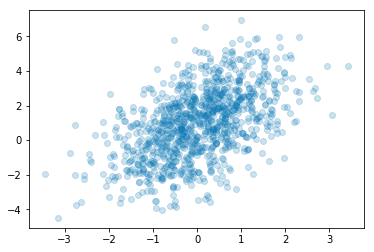

In [3]:
x = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(1000)
x.plot(alpha = 0.2)
x.mean(), x.sd(), x.corr()

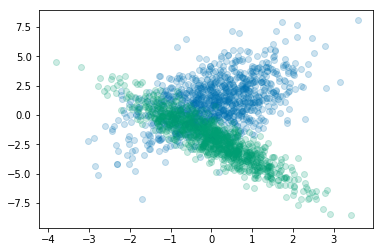

In [4]:
RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(1000).plot(alpha = 0.2)
RV(BivariateNormal(mean1 = 0, mean2 = -2, var1 = 1, var2 = 4, cov = -1.8)).sim(1000).plot(alpha = 0.2)

The marginal distributions of a bivariate normal distribution are (univariate) normal distributions.

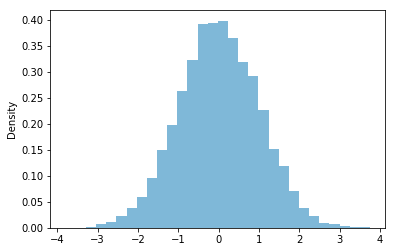

In [5]:
X, Y = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5))
X.sim(10000).plot()

<a id='mvn'></a>
### Multivate Normal

**Multivariate Normal distributions.** A bivariate normal distribution is a special case of a Multivariate Normal distribution (a.k.a. joint Gaussian distribution).  A multivariate normal distribution is specified by
* a mean vector, which specifies the marginal means
* a covariance matrix, which specifies the covariance between each coordinate pair.  (The diagonal entries of the covariance matrix specify the marginal variances

In [6]:
mu = [1, 2, 3]
Sigma = [[1, 1, -2],
         [1, 4, 0],
         [-2, 0, 9]]
X = RV(MultivariateNormal(mean = mu, cov = Sigma))
X.sim(5)

0,"(1.7746384950668848, 3.6086427624899153, 0.8624673311779487)"
1,"(2.507534470704685, 2.936186893151065, 0.7891365707472366)"
2,"(0.8969886176132308, 0.9388451994188012, -1.161724300098081)"
3,"(3.0074212340720496, 1.129835862980164, -1.7139652158479244)"
4,"(0.48671001834794225, 0.4338092879236535, 4.51548461110952)"


In [7]:
x = X.sim(10000)
x.mean(), x.cov()

((1.0100085528104872, 2.017977818193764, 2.9604311918176105),
 array([[ 1.01363298e+00,  1.00144652e+00, -2.05931416e+00],
        [ 1.00144652e+00,  3.98500923e+00, -4.46121654e-03],
        [-2.05931416e+00, -4.46121654e-03,  9.19552125e+00]]))

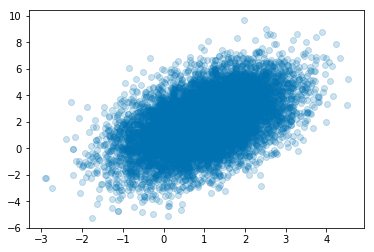

In [8]:
X, Y, Z = RV(MultivariateNormal(mean = mu, cov = Sigma))
(X & Y).sim(10000).plot(alpha = 0.2)

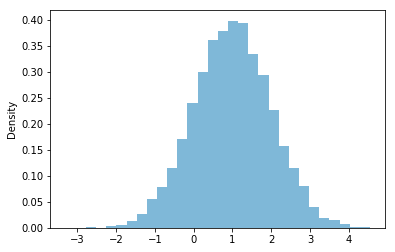

In [9]:
X.sim(10000).plot()